In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prometeo23-pre-event-ml/sample_submission.csv
/kaggle/input/prometeo23-pre-event-ml/train.csv
/kaggle/input/prometeo23-pre-event-ml/test.csv


In [2]:
train_loc='/kaggle/input/prometeo23-pre-event-ml/train.csv'
train_data=pd.read_csv(train_loc)
train_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767,label
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000,4
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011,1
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080,3
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987,4
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999,4


importing test data

In [3]:
test_loc='/kaggle/input/prometeo23-pre-event-ml/test.csv'
test_data=pd.read_csv(test_loc)
test_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,-588.812012,-16.459999,585.155029,407.606995,-10.286000,-84.586998,404.765991,271.266998,499.578003,-1278.270020,...,-661.101013,-581.062012,-915.862000,-15.428000,-123.609001,-44.327000,607.567017,-1553.897949,-312.118011,-1065.124023
1,2494.957031,-202.628998,2453.219971,180.735992,329.468994,250.464996,1946.031006,3399.147949,441.165985,-817.734985,...,252.505997,-1641.519043,-1040.286011,723.328979,1057.093994,-892.531006,-215.003006,1309.060059,-575.366028,-1667.469971
2,9.581000,-917.840027,707.869995,205.690994,767.721985,-133.733002,316.574005,187.778000,-874.216980,-273.199005,...,-113.867996,-285.209015,299.352997,-333.828003,98.253998,231.095993,162.904007,-453.291992,-38.993999,100.320999
3,528.770996,-4.656000,779.922974,176.306000,295.033997,-474.942993,443.114014,295.628998,219.356995,-855.742004,...,388.722992,-406.528992,-317.867004,51.375999,436.625000,233.684006,-644.229004,-416.923004,-410.556000,516.400024
4,4105.824219,1456.322998,3224.325928,1181.749023,3312.511963,2905.216064,705.135010,3758.070068,-1874.987061,-3637.200928,...,1427.248047,-2808.204102,-1510.807007,-170.334000,3416.754883,-2807.773926,-968.242004,-3440.810059,794.588989,-461.559998


Saving the training data and target data

In [4]:
X=train_data.copy()
y=X['label']
X=X.drop(columns=['label'])
X.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,225.628006,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,668.473999,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,868.348022,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,93.406998,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,-150.707001,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999


Making a first sample using 100 random features just too see what happens

using mutual information for the first 100 features

In [5]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::] 

f_60     0.050776
f_461    0.048621
f_109    0.048220
f_127    0.048157
f_308    0.046201
           ...   
f_300    0.009031
f_243    0.008845
f_382    0.006060
f_750    0.005310
f_551    0.004347
Name: MI Scores, Length: 768, dtype: float64

trying plotting all the features to find some sort of elbow in the graph

In [6]:
value=mi_scores.iloc[:]
value

f_60     0.050776
f_461    0.048621
f_109    0.048220
f_127    0.048157
f_308    0.046201
           ...   
f_300    0.009031
f_243    0.008845
f_382    0.006060
f_750    0.005310
f_551    0.004347
Name: MI Scores, Length: 768, dtype: float64

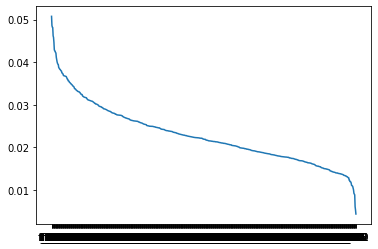

In [7]:
import matplotlib.pyplot as plt
plt.plot(mi_scores.index,mi_scores)

From the graph, it appears to be that the mutual information values start elbowing somewhere around 0.013. Lets select features above that only and see what happens

In [8]:
threshold=0.013
feature=mi_scores
# Find the indexes of the rows where the feature is greater than the threshold
indexes = feature[feature > threshold].index



lets view indexes

In [9]:
print(indexes)

Index(['f_60', 'f_461', 'f_109', 'f_127', 'f_308', 'f_523', 'f_688', 'f_520',
       'f_533', 'f_672',
       ...
       'f_303', 'f_137', 'f_668', 'f_666', 'f_271', 'f_284', 'f_277', 'f_264',
       'f_638', 'f_492'],
      dtype='object', length=747)


In [10]:
X.isnull().sum().sum()

0

lets make an Array for all the data of the selected features for both the train and test dataset

In [11]:
X_selected=X[indexes]
X_selected.head()
X_test_selected=test_data[indexes]
X_test_selected.head()

,f_60,f_461,f_109,f_127,f_308,f_523,f_688,f_520,f_533,f_672,...,f_303,f_137,f_668,f_666,f_271,f_284,f_277,f_264,f_638,f_492
0,350.971008,-433.502991,486.678986,605.304993,-26187.189453,-667.390015,-272.614990,514.187988,1598.451050,-863.268005,...,-351.092010,-177.561996,82.876999,-601.476990,281.057007,271.804993,1747.819946,-742.689026,188.889999,-35.171001
1,1913.490967,-482.644989,27.625999,-1437.417969,-52105.609375,-818.591980,-629.237976,617.257996,4787.193848,-2587.675049,...,1028.827026,-40.422001,881.296997,-1593.639038,747.461975,62.511002,737.338013,217.205002,-1038.723999,1648.621948
2,998.453979,619.905029,92.448997,-18.423000,-18594.810547,-145.104004,-612.976990,-896.288025,276.600006,-566.439026,...,-609.533997,-375.071991,-220.184998,627.466003,-471.270996,407.746002,791.568970,-702.120972,-66.257004,412.803986
3,359.234009,181.014008,300.427002,-326.671997,-15903.102539,11.936000,-416.011993,-484.533997,1172.359985,-108.601997,...,394.440002,113.899002,-140.643997,489.640991,-293.548004,72.682999,1003.343994,7.283000,146.837006,234.363007
4,7666.731934,4283.335938,-3380.354004,-1619.212036,-84551.437500,-1006.372009,-2668.556885,-4049.656982,2781.697998,2942.708008,...,-565.395996,3910.233887,573.719971,1030.496948,-536.570984,3020.743896,1923.182007,1431.508057,-1893.098999,525.828003


importing some important features for modelling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

fitting the model directly to the entire train data

Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_selected)
X_test = sc.transform(X_test_selected)

creating a RandomForest Model

In [14]:
from xgboost import XGBClassifier
model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)
modelxg=XGBClassifier(n_estimators=500)


defining and fitting a model

In [15]:
#model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)
#SVM_classifier.fit(X_train,y_train)
model.fit(X_train,y)

RandomForestClassifier(max_depth=5, n_estimators=250, random_state=1)

obtaining predictions from said model

In [16]:
predictions=model.predict(X_test)

checking where Id is located

In [17]:
test_data.index

RangeIndex(start=0, stop=8500, step=1)

Submitting a submission using predictions we obtained through model

In [18]:
output=pd.DataFrame({'Id':test_data.index,'Predicted':predictions})
output.to_csv('submission.csv',index=False)
print("Submission saved!")

Submission saved!


In [19]:
output.head()

,Id,Predicted
0,0,4
1,1,3
2,2,2
3,3,4
4,4,3
